# Q3: Set up using Python and Pandas

In [217]:
# Set up imports
from matplotlib import pyplot as plt
import numpy as np

In [219]:
# Extract all three datasets from text files
d1 = np.loadtxt("./Regression_Data/D1.txt", delimiter="\t"); # 20 examples
d2 = np.loadtxt("./Regression_Data/D2.txt", delimiter="\t"); # 100 examples
dt = np.loadtxt("./Regression_Data/Dt.txt", delimiter="\t"); # test data with 50 examples

In [282]:
# Confirm content downloaded into pandas dataframes
d1
# d2
# dt

array([[ 2.75121724,  3.24827058],
       [ 0.74357223,  4.45868397],
       [ 1.59868029,  6.41083955],
       [ 2.23071668,  4.8306706 ],
       [ 1.48714445,  6.39180724],
       [ 5.91139919, -0.44610692],
       [ 2.60250279,  5.01011507],
       [ 0.55767917,  4.41323427],
       [ 0.07435722,  1.98669948],
       [ 0.26025028,  3.52754418],
       [ 4.42425474, -0.58117605],
       [ 4.49861197,  0.06492432],
       [ 6.2460067 ,  2.48280578],
       [ 5.46525586, -0.30837189],
       [ 5.09346975, -2.6125076 ],
       [ 1.37560862,  7.53453781],
       [ 1.71021612,  4.5965746 ],
       [ 1.41278723,  6.34958685],
       [ 5.72550614,  0.13435154],
       [ 5.57679169, -1.30660296]])

In [283]:
# Demonstrate given dataset points visually
def plotter(x:np.array, y:np.array) -> plt.plot:
    plt.scatter(x,y,c='g')

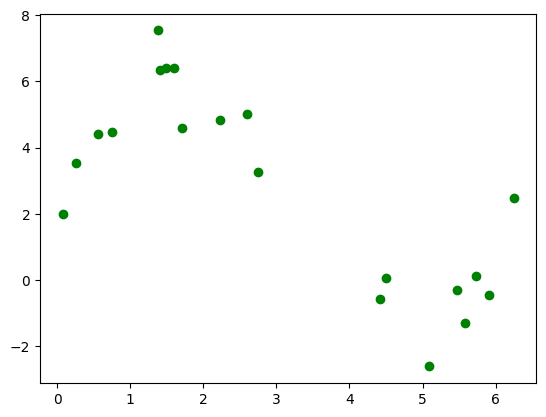

In [284]:
plotter(d1[:,0],d1[:,1])

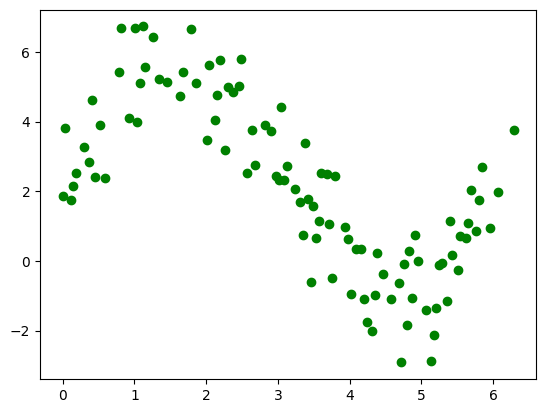

In [285]:
plotter(d2[:,0],d2[:,1])

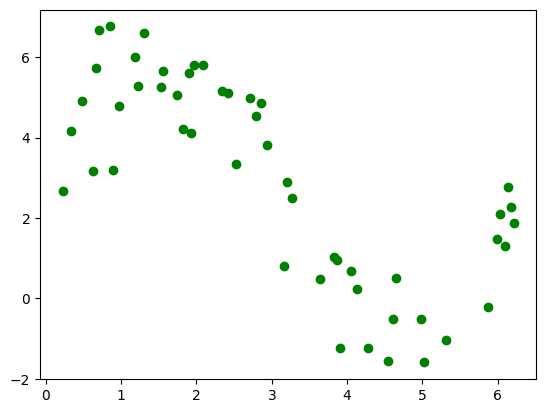

In [286]:
plotter(dt[:,0],dt[:,1])

## Part 3.1: Prove a large dataset provides better regularization compared to a smaller dataset.

### A. Use polynomial basis functions of degree 20 to convert input data from x -> phi(x), where phi(x) = [1,x,x2,...,x20]

"Despite its name, you can fit curves using linear regression. The most common method is to include polynomial terms in the linear model. Polynomial terms are independent variables that you raise to a power, such as squared or cubed terms." - From: https://statisticsbyjim.com/regression/curve-fitting-linear-nonlinear-regression/

In [258]:
'''
Parameters: x       -> numpy array of x values
            degree  -> integer value
Returns: numpy array of arrays containing phi(x) values as polinomials of desired degree, i.e. 20
'''
def polynomial_maker_fn(x:np.array, degree:int) -> np.array:
    ds = np.arange(0,degree+1, dtype=float) # Array of values from 0 to degree+1
    f = lambda x:x**ds
    return np.array([f(val) for val in x]) # Return each x value multiplied by all values in ds

### B. Fit Ridge Regression models for D1 and D2
Ridge regression is also called the L2 Regularization - info for personal learning found at: https://builtin.com/data-science/l2-regularization 

In [474]:
'''
Parameters:     lambda_constant -> float as a constant to be added to the diagonal of matrix multiplication
                phi_x -> multipolynomials of x values as a numpy array
                y -> dependent y values as numpy array
Returns:        numpy array
'''
def ridge_regression_fitter(lambda_constant:float, phi_x:np.array, y:np.array) -> np.array:

    # Create an identity matrix with 1 values in the diagonal, based on length of phi_x of 21
    id_matrix = np.identity(phi_x.shape[1])
    
    # Add the lambda constant to the diagonal of the identity matrix to ensure matrix is not ill-conditioned
    lambda_id = lambda_constant*id_matrix # Also called the penalty term
    '''
    Perform ridge regression of multipolinomials using numpy linalg.solve function
    to calculate theta* -> (X'X + lamda*Id)^(-1)*X'y as:
        - Calculate phi(x) transpose phi(x) as dot product, 
            then add it to the identity matrix containing the lambda
        - Multiply the phi(x) with y values of each dataset

        Thetas produced are coeficients working as a 'weight' assigned to the features based on their importance
    '''
    return np.linalg.solve(phi_x.T.dot(phi_x) + lambda_id, phi_x.T.dot(y))

### C. Demonstrate empirically that for a fixed Ridge Regression hyper-parameter λ, the larger dataset yields a better regularized solution: 
Empirical demonstrations are information and conclusions based on data rather than theory. Therefore, we will plot the fitted models for D1 and D2, respectively, by using matplotlib.

In [480]:
'''
Parameters:     estimated y/y hat -> numpy array of y values
                given y -> numpy array
                name of dataset -> string
                lambda used -> float
Returns:        score as a float
'''
def calculate_MSE(y_hat:np.array, y:np.array, data_name:str, lambda_val:float) -> float:
    MSE = np.mean((y_hat - y)**2)
    print(f'MSE for {data_name} with lambda {lambda_val} is: {MSE}')
    return MSE

In [481]:
'''
Parameters:     x values -> numpy array
                y values -> numpy array
                degree -> int
                lambda value -> float
                data_name -> string
Returns:        np.array
'''
def ridge_regression_graph(x:np.array, y:np.array, degree:int, lambda_val, data_name:str) ->np.array:
    # Call polynomial function
    phi_x = polynomial_maker_fn(x, degree)
    
    ''' 
    Call function to perform ridge regresion fit for d1 and d2 datasets - outputs theta

    All ridge regression estimates {theta(lambda) : lambda E [0, infinity]} is called 
    the solution path or regularization path of ridge regression estimator (theta is the estimator)
    '''
    theta = ridge_regression_fitter(lambda_val, phi_x,y)
    
    # Calculate the estimated y with the produced theta as y^ = phi*theta
    y_hat = phi_x.dot(theta) # Original phi_x values from given x - do not look good when plotted as lines

    # Calculate the mean squared error to check the average error and compare
    MSE = calculate_MSE(y_hat, y, data_name, lambda_val)
    
    # Create a range of values within the given x values to make it easier to depict the ridge curve
    xr = np.linspace(min(x), max(x), 500)
    phi_xr = polynomial_maker_fn(xr, degree)

    # Get estimated y for Phi_x values from range of values for curve visualization purposes
    yxr_hat = phi_xr.dot(theta) 
    
    # Set plot with ridge regression
    plt.scatter(x,y,c="g", label=data_name) # Set d1 data points green
    plt.plot(xr, yxr_hat, c='b', label=f'y hat of {data_name}') # Input line with predicted values of y
    plt.xlabel('x vals') # Create labels and legend
    plt.ylabel('y vals')
    plt.title(f'Ridge Regression with Polynomial Features/lambda {lambda_val}')
    plt.legend()
    plt.show() # Show all inside same plot

    return theta

### C.1 Plot the train data points and the regression curve.

MSE for D1 Data with lambda 0.1 is: 0.34326385959264355


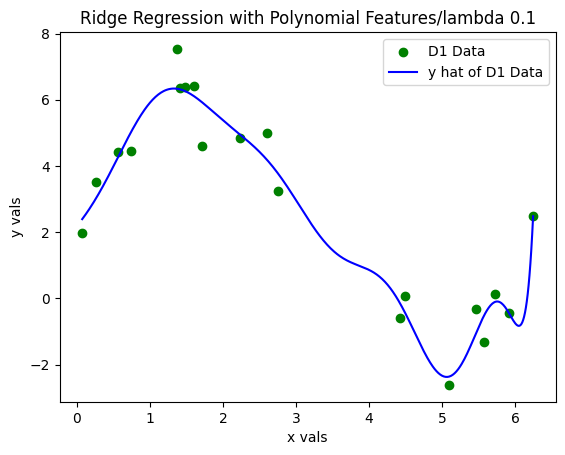

MSE for D2 Data with lambda 0.1 is: 0.9092036414044139


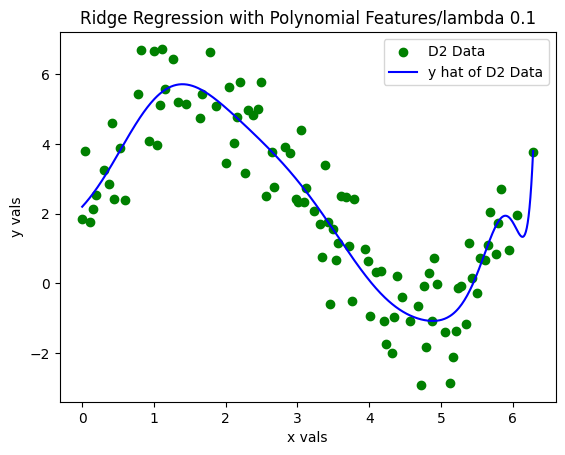

In [482]:
degree = 20
lambda_val = 0.1
# Call function to compare both results
theta1 = ridge_regression_graph(d1[:,0],d1[:,1],degree, lambda_val, 'D1 Data')
theta2 = ridge_regression_graph(d2[:,0],d2[:,1],degree, lambda_val, 'D2 Data')

### C.2. Evaluate the mean square error using Dt, where error is given as 1/m *Summation(y(i) − yˆ(i) )2.

In [381]:
def plot_regression_curve(x:np.array, y:np.array, theta:np.array, data_name:str) -> plt.show:
    # Create a range of values within the given x values to make it easier to depict the ridge curve
    xr = np.linspace(min(x), max(x), 500)
    phi_xr = polynomial_maker_fn(xr, degree)

    # Get estimated y for Phi_x values from range of values for curve visualization purposes
    yxr_hat = phi_xr.dot(theta) 

    # Set plot with ridge regression
    plt.scatter(x,y,c="g", label=data_name) # Set d1 data points green
    plt.plot(xr, yxr_hat, c='b', label=f'y hat of {data_name}') # Input line with predicted values of y
    plt.xlabel('x vals') # Create labels and legend
    plt.ylabel('y vals')
    plt.title(f'Ridge Regression with Polynomial Features/lambda {lambda_val}')
    plt.legend()
    plt.show() # Show all inside same plot

MSE for Test Data with Theta1 with lambda 0.1 is: 1.6419249814381263
MSE for Test Data with Theta2 with lambda 0.1 is: 1.0001391525614443


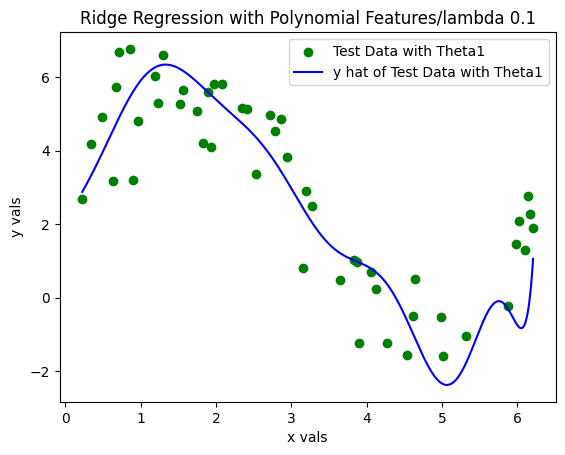

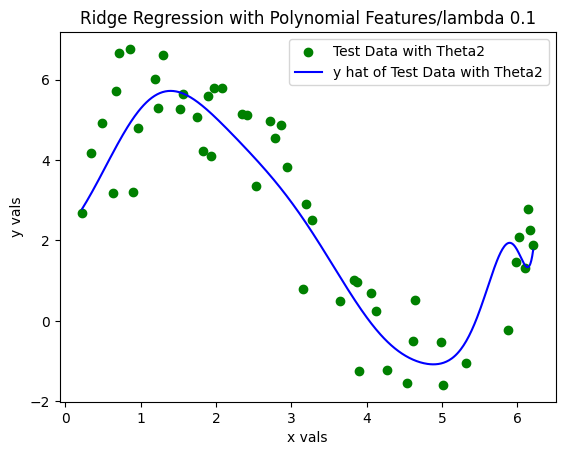

In [503]:
# Set degree and call polynomial function for test dataset's x column
phi_xdt = polynomial_maker_fn(dt[:,0], degree)

# Calculate the estimated y values based on D1 and D2 thetas
y_hat_d1 = phi_xdt.dot(theta1)
y_hat_d2 = phi_xdt.dot(theta2)

# Calculate the mean squared error to check the average error and compare
MSE1 = calculate_MSE(y_hat_d1, dt[:,1], "Test Data with Theta1", lambda_val)
MSE2 = calculate_MSE(y_hat_d2, dt[:,1], "Test Data with Theta2", lambda_val)

plot_regression_curve(dt[:,0], dt[:,1], theta1, 'Test Data with Theta1')
plot_regression_curve(dt[:,0], dt[:,1], theta2, 'Test Data with Theta2')

## Part 3.2: Implement Ridge Regression via the 20 Gaussian basis functions and D2 dataset.

In [488]:
# 20 gaussian basis functions
g_basis_fn_num = 20

# mean selection - 20 samples from data itself
mu_mean = np.random.choice(d2[:,0], g_basis_fn_num)

# Calculate variance - sigma**2 value - fixed at 1
variance = 1

# Lambdas to be selected from
lambda_vals = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]

# Number of k folds = 5
k_folds = 5

# Split dataset into k folds
f_folds = np.array_split(d2, k_folds) # D2 Data has 100 rows total, so 100/5 = 20 rows per fold
f_folds = np.array(f_folds)

" A common type of basis function for such models is the Gaussian basis function.  This type of model uses the kernel of the normal (or Gaussian) probability density function (PDF) as the basis function." from https://chemicalstatistician.wordpress.com/tag/gaussian-basis-function-models/

The formula for the gaussian basis function is phi(j)(x) = exp[-(x-mu(j))**2/2*s**2] which is part of the probability density function but just without the scaling factor.

More examples/info also at: https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html

In [433]:
''' 
parameters: x values -> numpy array
            mu values -> 20 randomly selected x values from dataset d2 as np.array
            variance -> previously set value int form
returns:    float
'''
def gaussian_basis_fn_modeling(x:np.array, mu:np.array, variance:int) -> np.array:
    return np.exp(-(x - mu)**2 / (2*variance)) # Because the variance is sigma**2

### Implement 5 fold cross validation to estimate the best lambda

In [491]:
# Variables to keep track and calculate average train and validation error curves
ave_train_e = []
ave_validation_e = []

# Navigate through each lambda value and perform cross validation
for l_val in lambda_vals:
    # Track the errors produced for each lambda
    train_errors = []
    val_errors = []
    
    # Perform division of dataset five times, i.e. navigate through data five times
    for i in range(k_folds):
        # Select the validation data
        validate = f_folds[i]

        # Select remaining groups as training data
        train = np.concatenate((f_folds[:i], f_folds[i+1:]))
        train = train.reshape(1,80,2)[0]

        # Perform the gaussian basis for 20 mu_means selected from train data
        gaussian_phi_t = np.array([gaussian_basis_fn_modeling(train[:,0], m, variance) for m in mu_mean]).T

        # Perform ridge regression and get the theta estimator - using old function from question 3.1
        g_theta = ridge_regression_fitter(l_val, gaussian_phi_t, train[:,1])

        # Calculate estimated y for the train set and validation set
        y_hat_train = gaussian_phi_t.dot(g_theta)

        gaussian_phi_v = np.array([gaussian_basis_fn_modeling(validate[:,0], m, variance) for m in mu_mean]).T
        y_hat_val = gaussian_phi_v.dot(g_theta)

        # Calculate the MSE
        MSE_t = calculate_MSE(y_hat_train, train[:,1], f"Train Data Fold {i+1}", l_val)
        MSE_v = calculate_MSE(y_hat_val, validate[:,1], f"Validation Data Fold {i+1}", l_val)
        train_errors.append(MSE_t)
        val_errors.append(MSE_v)

    # Calculate the average train and validation errors based on collected errors for each round of folds
    print("\n")
    print(f"Train error scores for lambda {l_val}: ", train_errors)
    print(f"Validation error scores for lambda {l_val}: ", val_errors, '\n')
    ave_train_e.append(np.mean(train_errors))
    ave_validation_e.append(np.mean(val_errors))

# Find the smallest error value to indicate the best lambda was has been found
best_l_v = lambda_vals[np.argmin(ave_validation_e)]
best_l_t = lambda_vals[np.argmin(ave_train_e)]
print("MSE validation averages for each lambda: ", ave_validation_e)
print("MSE training averages for each lambda: ", ave_train_e)
print("Best lambda for validation: ", best_l_v)
print("Best lambda for training: ", best_l_t)

MSE for Train Data Fold 1 with lambda 1e-05 is: 0.9734030437988977
MSE for Validation Data Fold 1 with lambda 1e-05 is: 0.8595929174897636
MSE for Train Data Fold 2 with lambda 1e-05 is: 0.9109167438558045
MSE for Validation Data Fold 2 with lambda 1e-05 is: 1.1480381401978108
MSE for Train Data Fold 3 with lambda 1e-05 is: 0.8766617002409862
MSE for Validation Data Fold 3 with lambda 1e-05 is: 1.2410580217919656
MSE for Train Data Fold 4 with lambda 1e-05 is: 0.837222503577355
MSE for Validation Data Fold 4 with lambda 1e-05 is: 1.3818977775344055
MSE for Train Data Fold 5 with lambda 1e-05 is: 0.9632031954439546
MSE for Validation Data Fold 5 with lambda 1e-05 is: 0.8695004303159163


Train error scores for lambda 1e-05:  [0.9734030437988977, 0.9109167438558045, 0.8766617002409862, 0.837222503577355, 0.9632031954439546]
Validation error scores for lambda 1e-05:  [0.8595929174897636, 1.1480381401978108, 1.2410580217919656, 1.3818977775344055, 0.8695004303159163] 

MSE for Train Data F

### Plot the average train and validation error curves with respect to log lambda

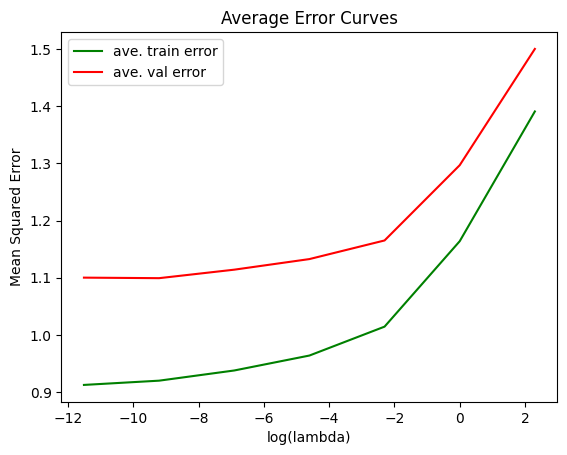

In [498]:
log_l = np.log(lambda_vals)
plt.plot(log_l, ave_train_e, c="g", label = "ave. train error")
plt.plot(log_l, ave_validation_e, c="r", label="ave. val error")
plt.title("Average Error Curves")
plt.xlabel("log(lambda)")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

### Plot the train data points and the regression curve solution for the best lambda

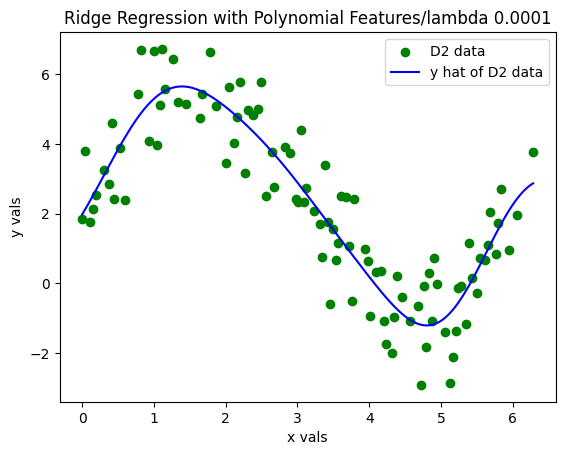

In [500]:
# Make gaussian basis functions for the whole dataset d2
gaussian_phi_d2 = np.array([gaussian_basis_fn_modeling(d2[:,0], m, variance) for m in mu_mean]).T

# Get theta estimator based on best lambda selected
best_theta = ridge_regression_fitter(best_l_v, gaussian_phi_d2, d2[:,1])

# Create a range of values within the given x values to make it easier to depict the ridge curve
xr2 = np.linspace(min(d2[:,0]), max(d2[:,0]), 500)
xr2_phi = np.array([gaussian_basis_fn_modeling(xr2, m, variance) for m in mu_mean]).T

# Get estimated y for Phi_x values from range of values for curve visualization purposes
yxr2_hat = xr2_phi.dot(best_theta)

# Set plot with ridge regression
plt.scatter(d2[:,0],d2[:,1],c="g", label="D2 data")
plt.plot(xr2, yxr2_hat, c='b', label=f'y hat of D2 data')
plt.xlabel('x vals') # Create labels and legend
plt.ylabel('y vals')
plt.title(f'Ridge Regression with Polynomial Features/lambda {best_l_v}')
plt.legend()
plt.show() # Show all inside same plot

### Evaluate the mean square error on the test Dataset Dt

In [502]:
# Perform the gaussian basis on Test Data
gaussian_phi_test = np.array([gaussian_basis_fn_modeling(dt[:,0], m, variance) for m in mu_mean]).T

# Calculate estimated y for test data
y_hat_test = gaussian_phi_test.dot(best_theta)

# Get MSE for evaluation of test data using estimated y values and original y values
MSE_test = calculate_MSE(y_hat_test, dt[:,1], "Test Data", best_l_v)

MSE for Test Data with lambda 0.0001 is: 0.9867226874784939
